In [183]:
# Import Packages
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')

In [184]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [185]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [186]:
cust_filter = data['cust_id'] == 'klant_69'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2016-01-01':'2019-01-01']

In [187]:
data.drop(['procesdag'], axis='columns', inplace=True)
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [188]:
data.head()

,cust_id,aantal_pakketten,validation_column
procesdag,,,
2016-01-01,klant_69,0.0,train
2016-01-04,klant_69,330.0,train
2016-01-05,klant_69,301.0,train
2016-01-06,klant_69,391.0,train
2016-01-07,klant_69,301.0,train


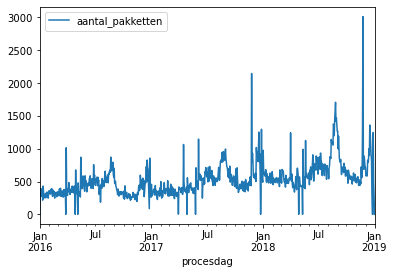

In [189]:
data.plot()

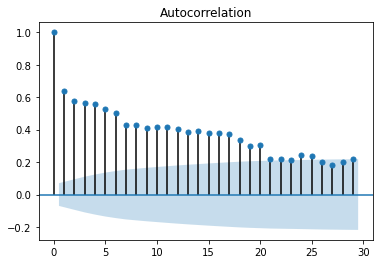

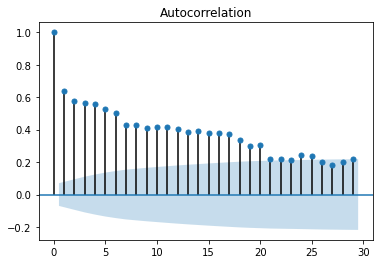

In [190]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['aantal_pakketten'])

In [191]:
data_diff = data['aantal_pakketten'].diff()

In [192]:
data_diff = data_diff[1:]
data_diff.head()

procesdag
2016-01-04    330.0
2016-01-05    -29.0
2016-01-06     90.0
2016-01-07    -90.0
2016-01-08    -25.0
Name: aantal_pakketten, dtype: float64

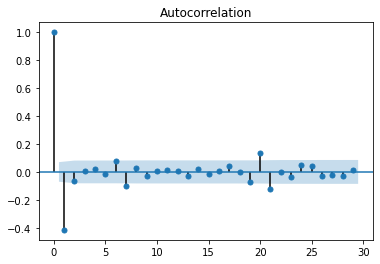

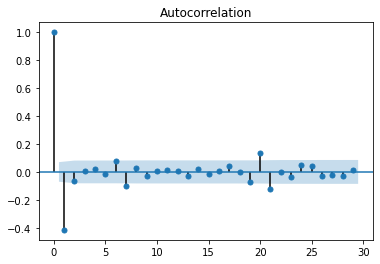

In [193]:
plot_acf(data_diff)

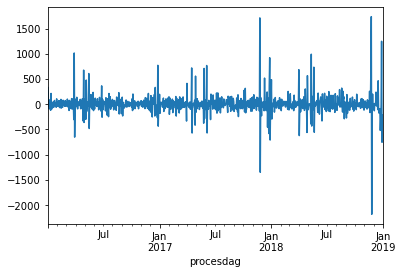

In [194]:
data_diff.plot()

In [195]:
X = data_diff.values
print(X.size)
train = X[0:752] # 500 training data
val = X[752:] # 22 testing data
predictions = []

782


# AR MODEL

In [196]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [197]:
predictions = model_ar_fit.predict(start=752, end=782)

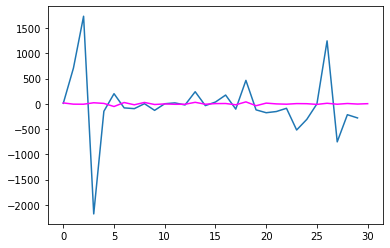

In [198]:
plt.plot(val)
plt.plot(predictions, color='magenta')

# ARIMA MODEL

In [199]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score

In [200]:
X = data.values
train = X[0:500] # 500 training data
val = X[500:]
print(X.size)

2349


In [201]:
# Fit ARIMA Model
fig = plt.figure(figsize=(20,8))
model = ARIMA(train, order=(1, 1, 0))
ax = plt.gca()
results = model.fit()
plt.plot(data_diff)
plt.plot(results.fittedvalues, color='magenta', alpha=1)
ax.legend(['Actual', 'Forecast'])
residuals = data_diff - results.fittedvalues
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

ValueError: could not convert string to float: 'train'

<Figure size 1440x576 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(20,8))
num_points = len(data_diff)
x = results.predict(start=(499), end=(522), dynamic=False)

plt.plot(data_diff[:499])
plt.plot(x, color='magenta')
plt.xlabel('Datum',fontsize= 18)
plt.ylabel('verschil Aantal Pakketen Vorige Dag',fontsize= 18)
plt.title('Modelsvoorspelling Klant 69',fontsize= 18)
plt.grid()
residuals = data_diff - results.fittedvalues
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

In [ ]:
diff = data_diff - x
plt.figure(figsize=(10,4))
plt.plot(diff)
plt.ylabel('Verschil Werkelijk En Voorspeld', fontsize=12)
plt.title('Verschil Tussen Werkelijk En Voorspeld Klant 69', fontsize=15)
plt.xticks(rotation=45)
plt.grid()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(data_diff[499:])
plt.plot(x[:-1])
plt.legend(('Data', 'Predictions'), fontsize=12)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Verschil Werkelijk En Voorspeld', fontsize=12)
plt.title('Werkelijk En Voorspeld Aantal Pakketten Klant 69', fontsize=15)
plt.xticks(rotation=45)
plt.grid()
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
from sklearn.metrics import r2_score
print(r2_score(data_diff[499:], x[:-1]))